In [1]:
#Import the required libraries
import os
import cv2
import glob
import random
import shutil
from collections import Counter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from imutils import paths
from pathlib import Path

Grab the dataset directories; the dataset comprises a training directory, a validation directory and a test directory.

In [2]:
#define the path to the dataset directory
data_dir = Path('C:\\Users\\Dell\Desktop\\CV Projects\\Pneumonia Diagnosis Using Chest Xrays\\datasets\\chest_xray\\chest_xray')

#define the path to the train directory
train_dir = data_dir / 'train'

#define the path to the validation directory
val_dir = data_dir / 'val'

#define the path to the test directory
test_dir = data_dir / 'test'

Each of the directories above is made up of 2 sub-directories:
* `NORMAL`: This directory describes the normal cases
* `PNEUMONIA`: This directory describes the pneumonia cases

<h3>Training Set</h3>

In [3]:
#define the paths to the normal and pneumonia cases sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

print('No. of files in the normal cases directory: {}'.format(len(list(paths.list_files(normal_cases_dir)))))
print('No. of images in the normal cases directory: {}'.format(len(list(paths.list_images(normal_cases_dir)))))
      
print('No. of files in the pneumonia cases directory: {}'.format(len(list(paths.list_files(pneumonia_cases_dir)))))
print('No. of images in the pneumonia cases directory: {}'.format(len(list(paths.list_images(pneumonia_cases_dir)))))     

No. of files in the normal cases directory: 1342
No. of images in the normal cases directory: 1341
No. of files in the pneumonia cases directory: 3876
No. of images in the pneumonia cases directory: 3875


In [4]:
#grab the paths to the images in the normal case and pneumonia case directoy
normal_cases = list(paths.list_images(normal_cases_dir))
pneumonia_cases = list(paths.list_images(pneumonia_cases_dir))

trainPaths = normal_cases + pneumonia_cases

#shuffle trainPaths
random.shuffle(trainPaths)

#grab the class of each path
trainLabels = [c.split(os.path.sep)[-2] for c in trainPaths]

<h3>Class Distribution</h3>

In [5]:
#get the counts for each class
counter = Counter(trainLabels)
print(counter)

Counter({'PNEUMONIA': 3875, 'NORMAL': 1341})


In [6]:
print('Normal Class Percentage: {:.2f}%'.format((counter['NORMAL']/(counter['NORMAL'] + counter['PNEUMONIA'])*100)))
print('Pneumonia Class Percentage: {:.2f}%'.format((counter['PNEUMONIA']/(counter['NORMAL'] + counter['PNEUMONIA'])*100)))

Normal Class Percentage: 25.71%
Pneumonia Class Percentage: 74.29%


Text(0, 0.5, 'Counts')

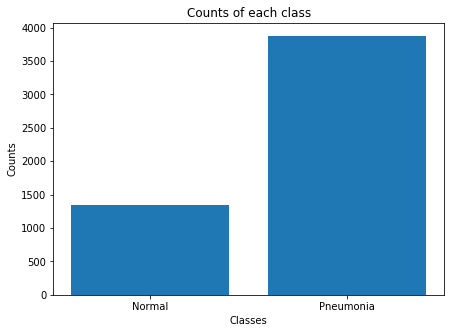

In [7]:
plt.figure(figsize=(7, 5))
plt.bar(x=['Normal', 'Pneumonia'], height=[counter['NORMAL'], counter['PNEUMONIA']])
plt.title('Counts of each class')
plt.xlabel('Classes')
plt.ylabel('Counts')

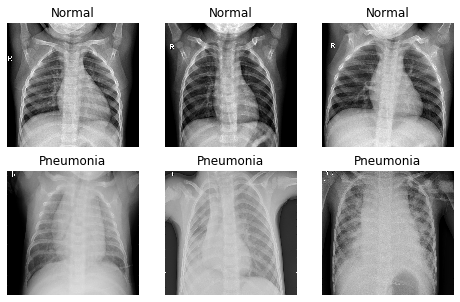

In [8]:
#get 3 samples from each of the classes
normal_cases_samples = random.sample(normal_cases, 3)
pneumonia_cases_samples = random.sample(pneumonia_cases, 3)

samples = normal_cases_samples + pneumonia_cases_samples

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))
for i in range(6):
    img = cv2.imread(samples[i])
    ax[i//3, i%3].imshow(img, cmap='gray')
    if i<3:
        ax[i//3, i%3].set_title("Normal")
    else:
        ax[i//3, i%3].set_title("Pneumonia")
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_aspect('auto')

<h3>Validation Set</h3>

In [9]:
#define the paths to the normal and pneumonia cases sub-directories
normal_cases_dir = val_dir / 'NORMAL'
pneumonia_cases_dir = val_dir / 'PNEUMONIA'

print('No. of files in the normal cases directory: {}'.format(len(list(paths.list_files(normal_cases_dir)))))
print('No. of images in the normal cases directory: {}'.format(len(list(paths.list_images(normal_cases_dir)))))
      
print('No. of files in the pneumonia cases directory: {}'.format(len(list(paths.list_files(pneumonia_cases_dir)))))
print('No. of images in the pneumonia cases directory: {}'.format(len(list(paths.list_images(pneumonia_cases_dir)))))     

No. of files in the normal cases directory: 9
No. of images in the normal cases directory: 8
No. of files in the pneumonia cases directory: 9
No. of images in the pneumonia cases directory: 8


In [10]:
#grab the paths to the images in the normal case and pneumonia case directory
normal_cases = list(paths.list_images(normal_cases_dir))
pneumonia_cases = list(paths.list_images(pneumonia_cases_dir))

valPaths = normal_cases + pneumonia_cases

#grab the class of each path
valLabels = [c.split(os.path.sep)[-2] for c in valPaths]

<h3>Test Set</h3>

In [11]:
#define the paths to the normal and pneumonia cases sub-directories
normal_cases_dir = test_dir / 'NORMAL'
pneumonia_cases_dir = test_dir / 'PNEUMONIA'

print('No. of files in the normal cases directory: {}'.format(len(list(paths.list_files(normal_cases_dir)))))
print('No. of images in the normal cases directory: {}'.format(len(list(paths.list_images(normal_cases_dir)))))
      
print('No. of files in the pneumonia cases directory: {}'.format(len(list(paths.list_files(pneumonia_cases_dir)))))
print('No. of images in the pneumonia cases directory: {}'.format(len(list(paths.list_images(pneumonia_cases_dir)))))     

No. of files in the normal cases directory: 234
No. of images in the normal cases directory: 234
No. of files in the pneumonia cases directory: 390
No. of images in the pneumonia cases directory: 390


In [12]:
#grab the paths to the images in the normal case and pneumonia case directory
normal_cases = list(paths.list_images(normal_cases_dir))
pneumonia_cases = list(paths.list_images(pneumonia_cases_dir))

valPaths = normal_cases + pneumonia_cases

#grab the class of each path
valLabels = [c.split(os.path.sep)[-2] for c in valPaths]